In [3]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [4]:
#load the dataset
mnist = fetch_openml('mnist_784', version=1)

In [20]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [46]:
some_i = 0
some_digit = X.iloc[some_i]
some_digit_img = some_digit.values.reshape(28, 28)

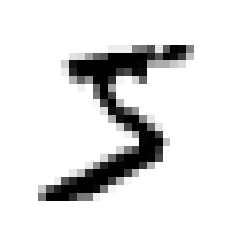

In [47]:
plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [50]:
y = y.astype(np.uint8)
y[some_i]

5

In [52]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [53]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [54]:
#training
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict([some_digit]) #predicts 5 correctly

c:\users\mehrshad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [70]:
#let's measure performance
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
#good

array([0.95035, 0.96035, 0.9604 ])

In [72]:
from sklearn.base import BaseEstimator
class Never5(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [74]:
never_5 = Never5()
cross_val_score(never_5, X_train, y_train_5, cv=3, scoring='accuracy')
#oops!

array([0.91125, 0.90855, 0.90915])

In [75]:
#we need F1 metric
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [80]:
print('precision: ',precision_score(y_train_5, y_train_pred))
print('recall: ', recall_score(y_train_5, y_train_pred))
print('F1: ', f1_score(y_train_5, y_train_pred))

precision:  0.8370879772350012
recall:  0.6511713705958311
F1:  0.7325171197343846
